In [1]:
# CONVERT ILLUMINA QIIME2 OUTPUT
# A script to convert the taxa bar plot csv file from Qiime2 where each sequence is a row
# and each taxonomic classification a column (and number of matching sequences cell values)

# Input:
# - input_taxonomy: A csv file with the taxa bar plot from Qiime2 [.csv]
# Output:
# - output_taxonomy: A csv file each sequence as a row, and its classification at different levels
# as columns

# ------------------------------------------------------------------------------------------------------

# TO BE SPECIFIED
# Input and output
in_file = '/Users/claranordquist/Documents/Universitetet/HT24/Tillämpad_bioinformatik/Applied-bioinformatics/05_Plot_the_results/01_Data/03_Reference_dataset/Zymobiomics_ref_raw.csv'
out_file = '/Users/claranordquist/Documents/Universitetet/HT24/Tillämpad_bioinformatik/Applied-bioinformatics/05_Plot_the_results/01_Data/03_Reference_dataset/Zymobiomics_ref_clean.csv'

# ------------------------------------------------------------------------------------------------------

In [2]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read the data
# Drop the last four columns ('Platform', 'Strategy', 'Source', 'Layout')
data = pd.read_csv(in_file, index_col='index')
data.drop(data.columns[-4:], axis=1, inplace=True)

In [10]:
data.index = ['Sample 1', 'Sample 2']
data.columns = ['s__Limosilactobacillus fermentum','d__Bacteria', 'g__Staphylococcus', 'f__Staskawiczbacteraceae', 'g__Bacillus', 'g__Listeria', 'Unassigned', 's__Alloprevotella sp004555055']

In [11]:
data_ratios = data.copy(deep=True)

for row in range(len(data)):
    data_ratios.iloc[row,:] /= data.iloc[row,:].sum()
data_ratios.columns = pd.CategoricalIndex(data_ratios.columns.values, ordered=True, categories=['g__Bacillus', 'g__Listeria', 'g__Staphylococcus', 's__Limosilactobacillus fermentum', 's__Alloprevotella sp004555055',  'f__Staskawiczbacteraceae', 'd__Bacteria', 'Unassigned'])
data_ratios = data_ratios.sort_index(axis=1)

In [12]:
colors = {'g__Bacillus':'Lightgreen', 'g__Listeria':'Darkgreen', 'g__Staphylococcus':'Lightblue', 's__Limosilactobacillus fermentum':'Forestgreen', 's__Alloprevotella sp004555055':'Purple',  'f__Staskawiczbacteraceae':'Pink', 'd__Bacteria':'Orange', 'Unassigned':'Brown'}

/var/folders/8y/zlyjdkl554bfq25qgv0m1v5r0000gn/T/ipykernel_1965/4200352087.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '20', '40', '60', '80', '100'])


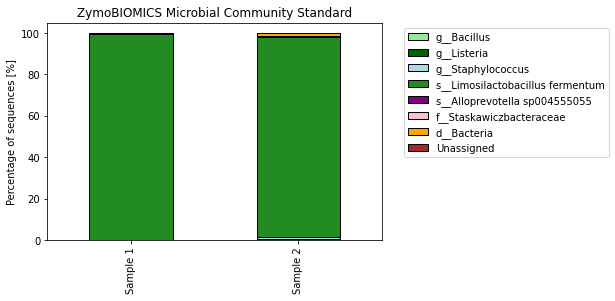

In [14]:
fig, ax = plt.subplots()
data_ratios.plot(kind='bar', color=colors, edgecolor='Black', stacked=True, ax=ax, legend=False)
ax.set_yticklabels(['0', '20', '40', '60', '80', '100'])
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title('ZymoBIOMICS Microbial Community Standard')
ax.set_ylabel('Percentage of sequences [%]')
ax.set_xlabel('')

plt.show()

fig.savefig('/Users/claranordquist/Documents/Universitetet/HT24/Tillämpad_bioinformatik/Applied-bioinformatics/05_Plot_the_results/02_Plots/03_Reference_dataset/Reference_communities.png', bbox_inches='tight')